# <center>Deep Learning - Neural Networks - Assignment 1</center> 

As a followup of the introductive part of this assignment, our goal is to experiment with various neural network models and their parameters.

### <center>Importing Needed Libraries</center>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import History
from tensorflow.keras.utils import to_categorical

### <center>A function to plot the 'history' of a specific model</center>

In [2]:
def plot_history(model, history, epochs, title):
    train_loss = history.history['loss']
    val_loss   = history.history['val_loss']
    train_acc  = history.history['accuracy']
    val_acc    = history.history['val_accuracy']
    x = list(range(1, epochs+1))
    plt.figure()
    plt.xlabel('Epochs')
    plt.title(title)
    plt.plot(x, train_loss, label='train_loss')
    plt.plot(x, val_loss, label = 'validation_loss')
    plt.plot(x, train_acc, label = 'train_accuracy')
    plt.plot(x, val_acc, label = 'validation_accuracy')
    plt.legend()
    plt.savefig(title)
    plt.show()

### <center>Importing MNIST and Showcasing Labels</center>

In [3]:
(x_training, y_training),(x_testing, y_testing) = mnist.load_data()
unique, counts = np.unique(y_training, return_counts=True)
print("Training Labels: ", dict(zip(unique, counts)))
unique, counts = np.unique(y_testing, return_counts=True)
print("\nTesting Labels: ", dict(zip(unique, counts)))

Training Labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Testing Labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


### <center>One Hot Coding</center>

In [4]:
classes_number = len(np.unique(y_training))
y_training = to_categorical(y_training)
y_testing = to_categorical(y_testing)

### <center>Reshping the Database for the Linear models, as well as the Convolutional one</center>

In [5]:
x_training = np.reshape(x_training, [-1, 784])
x_training = x_training.astype('float32') / 255
x_testing = np.reshape(x_testing, [-1, 784])
x_testing = x_testing.astype('float32') / 255
x_training_c = x_training.reshape((x_training.shape[0], 28, 28, 1)).astype('float32')
x_testing_c = x_testing.reshape((x_testing.shape[0], 28, 28, 1)).astype('float32')

### <center>Experimenting with various parameters</center>

#### <center>Hidden units in Layers and Model Type</center>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1

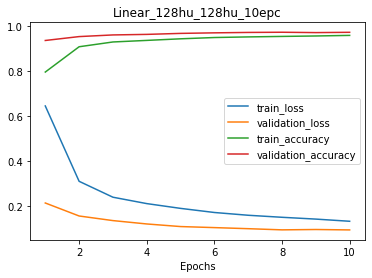

79/79 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9726

Test accuracy: 97.3%


In [6]:
batch_size = 128
hidden_units = 128
dropout = 0.45
epochs = 10

model = Sequential()
model.add(Dense(hidden_units, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(classes_number))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_training, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
plot_history(model, history, epochs, 'Linear_128hu_128hu_'+repr(epochs)+'epc')
loss, accuracy = model.evaluate(x_testing, y_testing, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

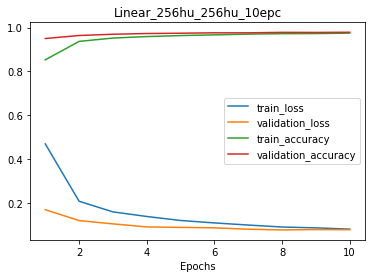

79/79 [==============================] - 0s 3ms/step - loss: 0.0648 - accuracy: 0.9798

Test accuracy: 98.0%


In [7]:
batch_size = 128
hidden_units = 256
dropout = 0.45
epochs = 10

model = Sequential()
model.add(Dense(hidden_units, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(classes_number))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_training, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
plot_history(model, history, epochs, 'Linear_256hu_256hu_'+repr(epochs)+'epc')
loss, accuracy = model.evaluate(x_testing, y_testing, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 512)               401920    
                                                                 
 activation_63 (Activation)  (None, 512)               0         
                                                                 
 dropout_48 (Dropout)        (None, 512)               0         
                                                                 
 dense_76 (Dense)            (None, 512)               262656    
                                                                 
 activation_64 (Activation)  (None, 512)               0         
                                                                 
 dropout_49 (Dropout)        (None, 512)               0         
                                                                 
 dense_77 (Dense)            (None, 10)              

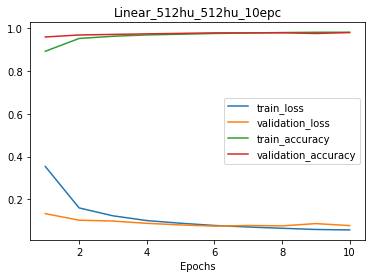

79/79 [==============================] - 0s 5ms/step - loss: 0.0690 - accuracy: 0.9810

Test accuracy: 98.1%


In [32]:
batch_size = 128
hidden_units = 512
dropout = 0.45
epochs = 10

model = Sequential()
model.add(Dense(hidden_units, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(classes_number))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_training, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
plot_history(model, history, epochs, 'Linear_512hu_512hu_'+repr(epochs)+'epc')
loss, accuracy = model.evaluate(x_testing, y_testing, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 512)               401920    
                                                                 
 activation_66 (Activation)  (None, 512)               0         
                                                                 
 dropout_50 (Dropout)        (None, 512)               0         
                                                                 
 dense_79 (Dense)            (None, 256)               131328    
                                                                 
 activation_67 (Activation)  (None, 256)               0         
                                                                 
 dropout_51 (Dropout)        (None, 256)               0         
                                                                 
 dense_80 (Dense)            (None, 10)              

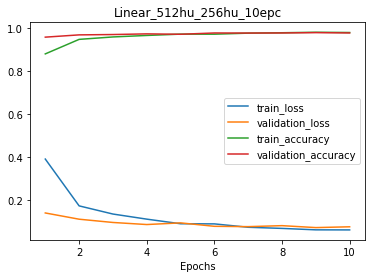

79/79 [==============================] - 0s 4ms/step - loss: 0.0699 - accuracy: 0.9807

Test accuracy: 98.1%


In [33]:
batch_size = 128
hidden_units_1 = 512
hidden_units_2 = 256
dropout = 0.45
epochs = 10

model = Sequential()
model.add(Dense(hidden_units_1, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(classes_number))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_training, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
plot_history(model, history, epochs, 'Linear_512hu_256hu_'+repr(epochs)+'epc')
loss, accuracy = model.evaluate(x_testing, y_testing, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 activation_13 (Activation)  (None, 512)               0         
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

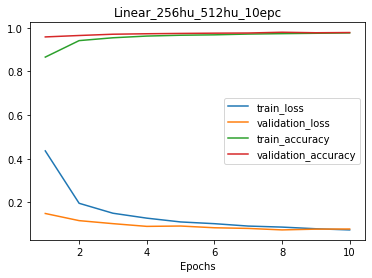

79/79 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9799

Test accuracy: 98.0%


In [10]:
batch_size = 128
hidden_units_1 = 256
hidden_units_2 = 512
dropout = 0.45
epochs = 10

model = Sequential()
model.add(Dense(hidden_units_1, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(classes_number))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_training, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
plot_history(model, history, epochs, 'Linear_256hu_512hu_'+repr(epochs)+'epc')
loss, accuracy = model.evaluate(x_testing, y_testing, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense_15 (Dense)            (None, 256)               1179904   
                                                                 
 dense_16 (Dense)            (None, 10)                2570      
                                                      

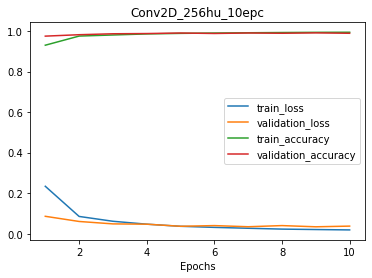

79/79 [==============================] - 1s 18ms/step - loss: 0.0336 - accuracy: 0.9891

Test accuracy: 98.9%


In [11]:
batch_size = 128
hidden_units = 256
dropout = 0.45
epochs = 10

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(classes_number, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_training_c, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
plot_history(model, history, epochs, 'Conv2D_256hu_'+repr(epochs)+'epc')
loss, accuracy = model.evaluate(x_testing_c, y_testing,  batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

#### <center>Number of Epochs</center>

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 512)               401920    
                                                                 
 activation_39 (Activation)  (None, 512)               0         
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 activation_40 (Activation)  (None, 256)               0         
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 10)              

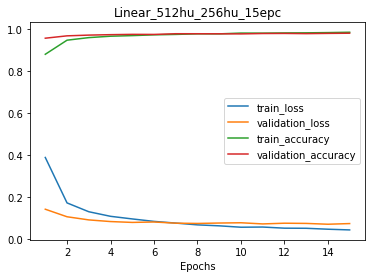

79/79 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.9814

Test accuracy: 98.1%
Epoch 1/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0.0736 - val_accuracy: 0.9803
Epoch 2/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0416 - accuracy: 0.9864 - val_loss: 0.0776 - val_accuracy: 0.9811
Epoch 3/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0404 - accuracy: 0.9869 - val_loss: 0.0779 - val_accuracy: 0.9806
Epoch 4/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0776 - val_accuracy: 0.9813
Epoch 5/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0388 - accuracy: 0.9869 - val_loss: 0.0754 - val_accuracy: 0.9819
Epoch 6/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0338 - accuracy: 0.9887 - val_loss: 0.0791 - val_accuracy: 0.9821
Epoch 7/20
375/375 [=============

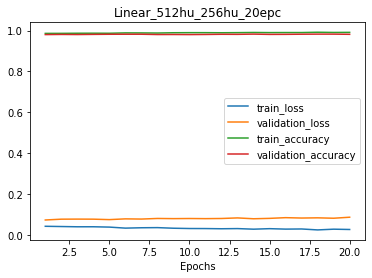

79/79 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9839

Test accuracy: 98.4%


In [20]:
batch_size = 128
hidden_units_1 = 512
hidden_units_2 = 256
dropout = 0.45
epochs=(15,20)
model = Sequential()
model.add(Dense(hidden_units_1, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(classes_number))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

for epoch in epochs:
  test = epoch
  history = model.fit(x_training, y_training, epochs=epoch, batch_size=batch_size, validation_split = 0.2, verbose = 1)
  plot_history(model, history, epoch, 'Linear_512hu_256hu_'+repr(epoch)+'epc')
  loss, accuracy = model.evaluate(x_testing, y_testing, batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_31 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_47 (Dense)            (None, 256)               1179904   
                                                                 
 dense_48 (Dense)            (None, 10)                2570      
                                                     

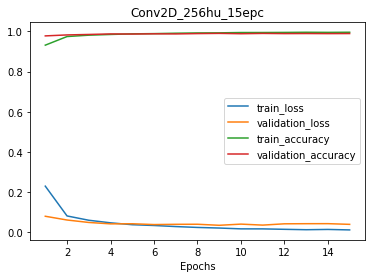

79/79 [==============================] - 1s 18ms/step - loss: 0.0344 - accuracy: 0.9899

Test accuracy: 99.0%
Epoch 1/20
375/375 [==============================] - 29s 77ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0487 - val_accuracy: 0.9886
Epoch 2/20
375/375 [==============================] - 29s 77ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0396 - val_accuracy: 0.9900
Epoch 3/20
375/375 [==============================] - 29s 76ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.0439 - val_accuracy: 0.9900
Epoch 4/20
375/375 [==============================] - 29s 77ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0399 - val_accuracy: 0.9905
Epoch 5/20
375/375 [==============================] - 29s 76ms/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.0424 - val_accuracy: 0.9908
Epoch 6/20
375/375 [==============================] - 29s 77ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0495 - val_accuracy: 0.9897
Epoch 7/20
375/375 [======

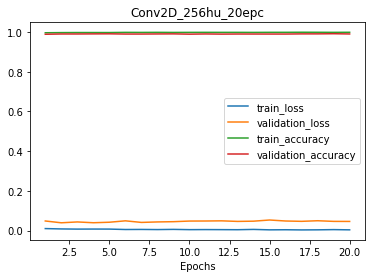

79/79 [==============================] - 1s 19ms/step - loss: 0.0454 - accuracy: 0.9891

Test accuracy: 98.9%


In [23]:
batch_size = 128
hidden_units = 256
dropout = 0.45
epochs=[15,20]
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(classes_number, activation='softmax'))
model.summary()
for epoch in epochs:
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(x_training_c, y_training, epochs=epoch, batch_size=batch_size, validation_split = 0.2, verbose = 1)
  plot_history(model, history, epoch, 'Conv2D_256hu_'+repr(epoch)+'epc')
  loss, accuracy = model.evaluate(x_testing_c, y_testing,  batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

#### <center>Use of various Optimizers</center>

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 512)               401920    
                                                                 
 activation_75 (Activation)  (None, 512)               0         
                                                                 
 dropout_56 (Dropout)        (None, 512)               0         
                                                                 
 dense_88 (Dense)            (None, 256)               131328    
                                                                 
 activation_76 (Activation)  (None, 256)               0         
                                                                 
 dropout_57 (Dropout)        (None, 256)               0         
                                                                 
 dense_89 (Dense)            (None, 10)              

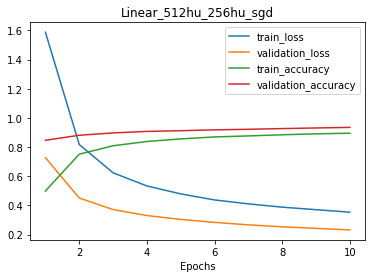

79/79 [==============================] - 0s 4ms/step - loss: 0.2361 - accuracy: 0.9313

Test accuracy: 93.1%
Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.2524 - accuracy: 0.9237 - val_loss: 0.1250 - val_accuracy: 0.9641
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1594 - accuracy: 0.9519 - val_loss: 0.0953 - val_accuracy: 0.9704
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1218 - accuracy: 0.9625 - val_loss: 0.0896 - val_accuracy: 0.9737
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1048 - accuracy: 0.9682 - val_loss: 0.0836 - val_accuracy: 0.9753
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0886 - accuracy: 0.9726 - val_loss: 0.0818 - val_accuracy: 0.9759
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0792 - accuracy: 0.9755 - val_loss: 0.0783 - val_accuracy: 0.9779
Epoch 7/10
375/375 [=============

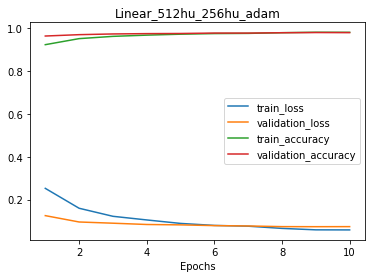

79/79 [==============================] - 0s 4ms/step - loss: 0.0703 - accuracy: 0.9809

Test accuracy: 98.1%
Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0458 - accuracy: 0.9849 - val_loss: 0.0697 - val_accuracy: 0.9813
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0431 - accuracy: 0.9861 - val_loss: 0.0683 - val_accuracy: 0.9819
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0417 - accuracy: 0.9866 - val_loss: 0.0675 - val_accuracy: 0.9817
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.0670 - val_accuracy: 0.9820
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0667 - val_accuracy: 0.9823
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0665 - val_accuracy: 0.9824
Epoch 7/10
375/375 [=============

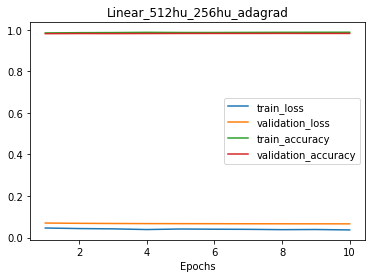

79/79 [==============================] - 0s 4ms/step - loss: 0.0617 - accuracy: 0.9840

Test accuracy: 98.4%
Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.0658 - val_accuracy: 0.9824
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.0658 - val_accuracy: 0.9824
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0657 - val_accuracy: 0.9824
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0369 - accuracy: 0.9881 - val_loss: 0.0657 - val_accuracy: 0.9823
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0657 - val_accuracy: 0.9823
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0658 - val_accuracy: 0.9823
Epoch 7/10
375/375 [=============

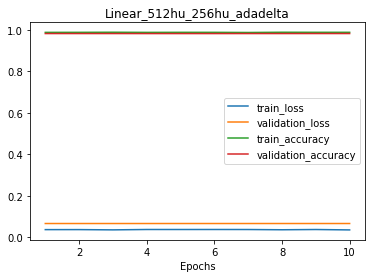

79/79 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9841

Test accuracy: 98.4%


In [36]:
batch_size = 128
hidden_units_1 = 512
hidden_units_2 = 256
dropout = 0.45
epochs = 10

model = Sequential()
model.add(Dense(hidden_units_1, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(classes_number))
model.add(Activation('softmax'))

model.summary()
for optimizer in ("sgd", "adam", "adagrad", "adadelta"):
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  history = model.fit(x_training, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
  plot_history(model, history, epochs, 'Linear_512hu_256hu_'+optimizer)
  loss, accuracy = model.evaluate(x_testing, y_testing, batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_38 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_58 (Dense)            (None, 256)               1179904   
                                                                 
 dense_59 (Dense)            (None, 10)                2570      
                                                     

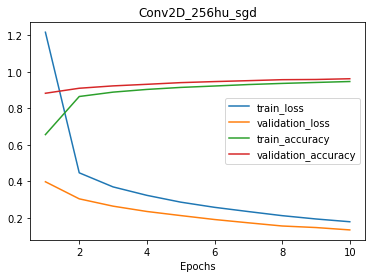

Results for optimizer: sgd 

79/79 [==============================] - 1s 18ms/step - loss: 0.1290 - accuracy: 0.9643

Test accuracy: 96.4%
Epoch 1/10
375/375 [==============================] - 30s 78ms/step - loss: 0.1338 - accuracy: 0.9590 - val_loss: 0.0593 - val_accuracy: 0.9822
Epoch 2/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 3/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0451 - accuracy: 0.9852 - val_loss: 0.0436 - val_accuracy: 0.9877
Epoch 4/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0352 - accuracy: 0.9883 - val_loss: 0.0444 - val_accuracy: 0.9866
Epoch 5/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0411 - val_accuracy: 0.9873
Epoch 6/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0447 - val_accuracy: 0.98

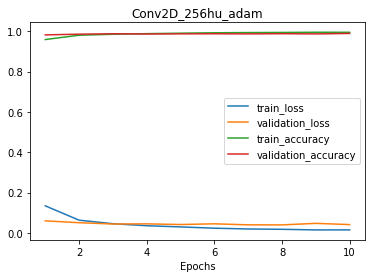

Results for optimizer: adam 

79/79 [==============================] - 1s 18ms/step - loss: 0.0368 - accuracy: 0.9892

Test accuracy: 98.9%
Epoch 1/10
375/375 [==============================] - 29s 76ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0386 - val_accuracy: 0.9898
Epoch 2/10
375/375 [==============================] - 28s 75ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.0378 - val_accuracy: 0.9902
Epoch 3/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.0374 - val_accuracy: 0.9904
Epoch 4/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0372 - val_accuracy: 0.9904
Epoch 5/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0371 - val_accuracy: 0.9905
Epoch 6/10
375/375 [==============================] - 29s 77ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0369 - val_accuracy: 0.9

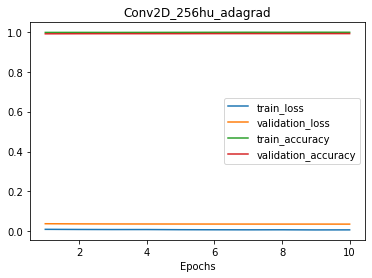

Results for optimizer: adagrad 

79/79 [==============================] - 1s 19ms/step - loss: 0.0342 - accuracy: 0.9898

Test accuracy: 99.0%
Epoch 1/10
375/375 [==============================] - 30s 79ms/step - loss: 0.0075 - accuracy: 0.9973 - val_loss: 0.0365 - val_accuracy: 0.9908
Epoch 2/10
375/375 [==============================] - 29s 79ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0365 - val_accuracy: 0.9908
Epoch 3/10
375/375 [==============================] - 29s 78ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0365 - val_accuracy: 0.9908
Epoch 4/10
375/375 [==============================] - 29s 78ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0365 - val_accuracy: 0.9908
Epoch 5/10
375/375 [==============================] - 30s 79ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.0365 - val_accuracy: 0.9908
Epoch 6/10
375/375 [==============================] - 29s 78ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.0365 - val_accuracy: 

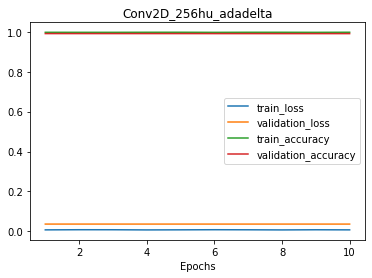

Results for optimizer: adadelta 

79/79 [==============================] - 1s 19ms/step - loss: 0.0341 - accuracy: 0.9898

Test accuracy: 99.0%


In [27]:
batch_size = 128
hidden_units = 256
dropout = 0.45
epochs = 10
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(classes_number, activation='softmax'))

model.summary()

for optimizer in ("sgd", "adam", "adagrad", "adadelta"):
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  history = model.fit(x_training_c, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
  plot_history(model, history, epochs, 'Conv2D_256hu_'+optimizer)
  print("Results for optimizer:", optimizer, "\n")
  loss, accuracy = model.evaluate(x_testing_c, y_testing, batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

#### <center>Different Dropout Percentage</center>

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 512)               401920    
                                                                 
 activation_69 (Activation)  (None, 512)               0         
                                                                 
 dropout_52 (Dropout)        (None, 512)               0         
                                                                 
 dense_82 (Dense)            (None, 256)               131328    
                                                                 
 activation_70 (Activation)  (None, 256)               0         
                                                                 
 dropout_53 (Dropout)        (None, 256)               0         
                                                                 
 dense_83 (Dense)            (None, 10)              

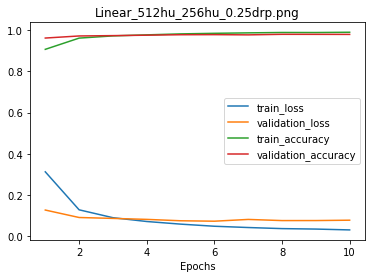

79/79 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9827

Test accuracy: 98.3%
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 512)               401920    
                                                                 
 activation_72 (Activation)  (None, 512)               0         
                                                                 
 dropout_54 (Dropout)        (None, 512)               0         
                                                                 
 dense_85 (Dense)            (None, 256)               131328    
                                                                 
 activation_73 (Activation)  (None, 256)               0         
                                                                 
 dropout_55 (Dropout)        (None, 256)               0         
          

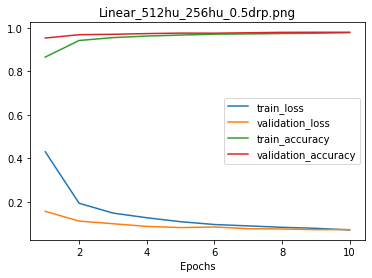

79/79 [==============================] - 0s 4ms/step - loss: 0.0672 - accuracy: 0.9811

Test accuracy: 98.1%


In [35]:
batch_size = 128
hidden_units_1 = 512
hidden_units_2 = 256
epochs = 10

for dropout in [0.25, 0.5]:
  model = Sequential()
  model.add(Dense(hidden_units_1, input_dim=784))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(hidden_units_2))
  model.add(Activation('relu'))
  model.add(Dropout(dropout))
  model.add(Dense(classes_number))
  model.add(Activation('softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(x_training, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
  plot_history(model, history, epochs, 'Linear_512hu_256hu_'+repr(dropout)+'drp.png')
  loss, accuracy = model.evaluate(x_testing, y_testing, batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_46 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_71 (Dense)            (None, 256)               1179904   
                                                                 
 dense_72 (Dense)            (None, 10)                2570      
                                                     

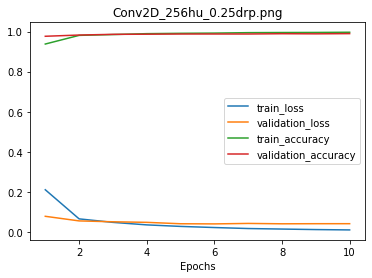

79/79 [==============================] - 1s 18ms/step - loss: 0.0377 - accuracy: 0.9895

Test accuracy: 98.9%
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_47 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_73 (Dense)            (None, 256)               1179904   
                                                                 
 dense_74

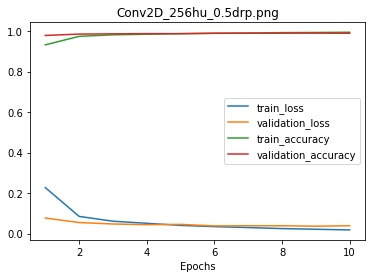

79/79 [==============================] - 1s 18ms/step - loss: 0.0334 - accuracy: 0.9899

Test accuracy: 99.0%


In [31]:
batch_size = 128
hidden_units = 256
epochs = 10

for dropout in [0.25, 0.5]:
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(dropout))
  model.add(Flatten())
  model.add(Dense(hidden_units, activation='relu'))
  model.add(Dense(classes_number, activation='softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(x_training_c, y_training, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose = 1)
  plot_history(model, history, epochs, 'Conv2D_256hu_'+repr(dropout)+'drp.png')
  loss, accuracy = model.evaluate(x_testing_c, y_testing, batch_size=batch_size)
  print("\nTest accuracy: %.1f%%" % (100.0 * accuracy))